# Analyzing a real world data-set with SQL and Python

## Objectives

-   Understand a dataset of selected socioeconomic indicators in Chicago
-   Store data in an Db2 database on IBM Cloud instance
-   Solve example problems


## Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ), but to summarize, the dataset has the following variables:

-   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

-   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago 

-   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

-   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

-   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

-   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

-   **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

-   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

-   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In this Lab, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.


### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [43]:
import sqlalchemy
import ibm_db_sa
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [2]:
connection_string = "ibm_db_sa://nhr87395:n6k6mlj7x1f%408vs2@dashdb-txn-sbox-yp-lon02-13.services.eu-gb.bluemix.net:50000/BLUDB"

%sql $connection_string

DB2/LINUXX8664


'Connected: nhr87395@BLUDB'

### Store the dataset in a Table

##### In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.

##### We will first read the dataset source .CSV from the internet into pandas dataframe

##### Then we need to create a table in our Db2 database to store the dataset. The PERSIST command in SQL "magic" simplifies the process of table creation and writing the data from a `pandas` dataframe into the table


In [13]:
chicago_socioeconomic_data = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv', index_col='ca')

chicago_socioeconomic_data

,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
ca,,,,,,,,
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...
74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0


In [14]:
chicago_socioeconomic_data.dtypes

community_area_name                             object
percent_of_housing_crowded                     float64
percent_households_below_poverty               float64
percent_aged_16_unemployed                     float64
percent_aged_25_without_high_school_diploma    float64
percent_aged_under_18_or_over_64               float64
per_capita_income_                               int64
hardship_index                                 float64
dtype: object

In [16]:
%sql drop table chicago_socioeconomic_data;
%sql PERSIST chicago_socioeconomic_data;

 * ibm_db_sa://nhr87395:***@dashdb-txn-sbox-yp-lon02-13.services.eu-gb.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Exception('Statement Execute Failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0204N  "NHR87395.CHICAGO_SOCIOECONOMIC_DATA" is an undefined name.  SQLSTATE=42704\r SQLCODE=-204')
[SQL: drop table chicago_socioeconomic_data;]
(Background on this error at: http://sqlalche.me/e/13/f405)
 * ibm_db_sa://nhr87395:***@dashdb-txn-sbox-yp-lon02-13.services.eu-gb.bluemix.net:50000/BLUDB


'Persisted chicago_socioeconomic_data'

##### Verify that the table creation was successful


In [18]:
%sql SELECT * FROM chicago_socioeconomic_data LIMIT 5;

 * ibm_db_sa://nhr87395:***@dashdb-txn-sbox-yp-lon02-13.services.eu-gb.bluemix.net:50000/BLUDB
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


## Problems

### Problem 1

##### How many rows are in the dataset?


In [20]:
%sql select count(*) as num_rows from chicago_socioeconomic_data

 * ibm_db_sa://nhr87395:***@dashdb-txn-sbox-yp-lon02-13.services.eu-gb.bluemix.net:50000/BLUDB
Done.


num_rows
78


### Problem 2

##### How many community areas in Chicago have a hardship index greater than 50.0?


In [21]:
%sql select count(*) as num_communities_hardship from chicago_socioeconomic_data where hardship_index > 50.

 * ibm_db_sa://nhr87395:***@dashdb-txn-sbox-yp-lon02-13.services.eu-gb.bluemix.net:50000/BLUDB
Done.


num_communities_hardship
38


### Problem 3

##### What is the maximum value of hardship index in this dataset?


In [22]:
%sql select max(hardship_index) as max_hardship from chicago_socioeconomic_data

 * ibm_db_sa://nhr87395:***@dashdb-txn-sbox-yp-lon02-13.services.eu-gb.bluemix.net:50000/BLUDB
Done.


max_hardship
98.0


### Problem 4

##### Which community area has the highest hardship index?



In [23]:
%%sql select community_area_name from chicago_socioeconomic_data 
    where hardship_index = (select max(hardship_index) from chicago_socioeconomic_data)

 * ibm_db_sa://nhr87395:***@dashdb-txn-sbox-yp-lon02-13.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


### Problem 5

##### Which Chicago community areas have per-capita incomes greater than $60,000?


In [25]:
%sql select community_area_name from chicago_socioeconomic_data where per_capita_income_ > 60000

 * ibm_db_sa://nhr87395:***@dashdb-txn-sbox-yp-lon02-13.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


### Problem 6

##### Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.


In [27]:
data = %sql select per_capita_income_, hardship_index from chicago_socioeconomic_data

 * ibm_db_sa://nhr87395:***@dashdb-txn-sbox-yp-lon02-13.services.eu-gb.bluemix.net:50000/BLUDB
Done.


<AxesSubplot:xlabel='per_capita_income_', ylabel='hardship_index'>

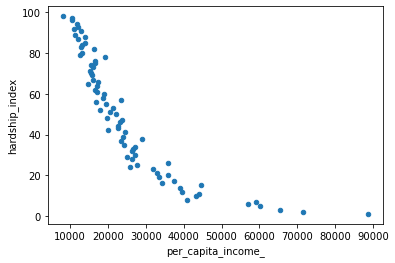

In [41]:
df = data.DataFrame()

df.plot(x='per_capita_income_', y='hardship_index', kind='scatter')

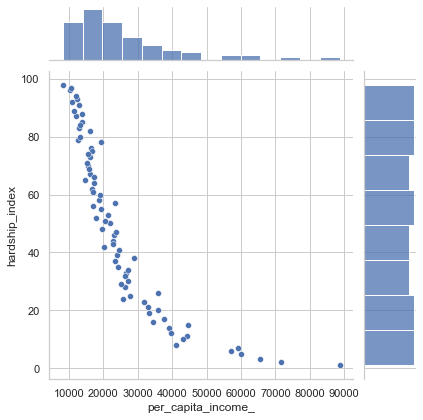

In [55]:
# Apply the default theme
sns.set_theme()
sns.set_style("whitegrid")

plot = sns.jointplot(x='per_capita_income_', y='hardship_index', data=df)


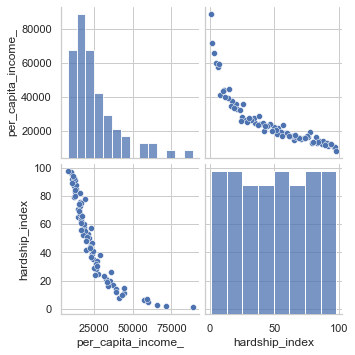

In [57]:
plot = sns.pairplot(data=df)

### Conclusion

##### Now that you know how to do basic exploratory data analysis using SQL and python visualization tools, you can further explore this dataset to see how the variable `per_capita_income_` is related to `percent_households_below_poverty` and `percent_aged_16_unemployed`. Try to create interesting visualizations!
